=== Default Model (10 trees) ===
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

=== Tuned Model ===
Best Accuracy: 1.0000
Best Number of Trees: 1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


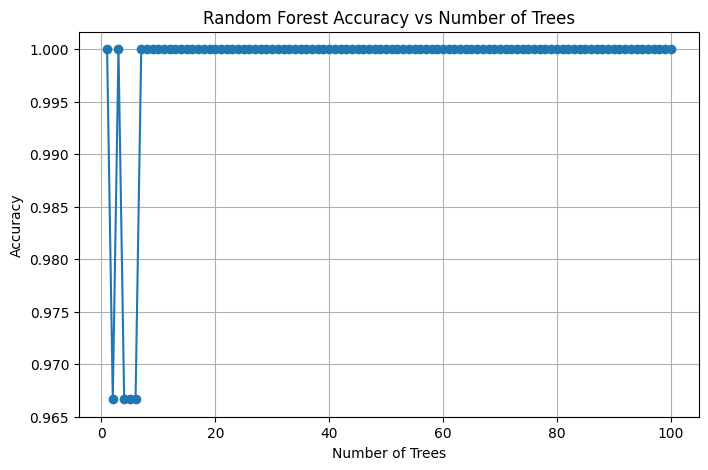

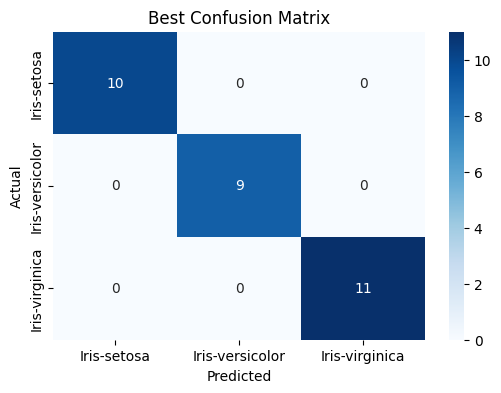

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("iris (3).csv")

# Features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------
# 1. Default Random Forest with 10 estimators
# ---------------------------------------------
clf_default = RandomForestClassifier(n_estimators=10, random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
default_cm = confusion_matrix(y_test, y_pred_default)

print("=== Default Model (10 trees) ===")
print(f"Accuracy: {default_accuracy:.4f}")
print("Confusion Matrix:")
print(default_cm)

# ---------------------------------------------
# 2. Fine-tune number of trees for best accuracy
# ---------------------------------------------
best_score = 0
best_n = 0
best_model = None
best_cm = None

scores = []
n_estimators_range = range(1, 101)

for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

    if score > best_score:
        best_score = score
        best_n = n
        best_model = clf
        best_cm = confusion_matrix(y_test, y_pred)

# Print best result
print("\n=== Tuned Model ===")
print(f"Best Accuracy: {best_score:.4f}")
print(f"Best Number of Trees: {best_n}")
print("Confusion Matrix:")
print(best_cm)

# Plot accuracy vs number of trees
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, scores, marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.grid(True)
plt.show()

# Plot best confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(best_cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Best Confusion Matrix")
plt.show()
